# Annotation Analysis

Finding answer to:
    - How complete is OSM data in comparison to rich place knowledge in leisure walks?
    - How selective people are considering selected POIs in lesiure walks and available POIs nearby?
    - Can a machine immitate this selective behaviour?

Aspects considered:

    1. POIs belong to classes identified in previous step
    2. OSM keys of POI
    3. lesiure walk ID as a proxy to consider individual preferences and styles


## Setup

In [1]:
# working with files
import os.path
# sys
import sys

# warning off
import warnings
# IO
import json

# requests
import requests

# dataframe 
import numpy as np
import pandas as pd
import geopandas as gpd


# visualization
import matplotlib.pyplot as plt

# logging
from loguru import logger

# set logger level
logger.remove(0)
logger.add(sys.stderr, level="INFO")

warnings.filterwarnings("ignore")

## Loading OSM POIs and Annotations

In [2]:
with open('dataset/walkingmaps.json', 'r', encoding='utf-8') as fp:
    dataset = json.load(fp)

data_structure = {
    'record_id': [], 'record_title':[], 'record_description':[],
    'poi_title':[], 'poi_summary':[], 'latitude': [], 'longitude': []}

for record_id, record in enumerate(dataset):
    if 'pois' in record.keys() and len(record['pois']) > 0:
        for poi in record['pois']:
            data_structure['record_id'].append(record_id)
            data_structure['record_title'].append(record['title'])
            data_structure['record_description'].append(record['description'])
            data_structure['poi_title'].append(poi['title'])
            data_structure['poi_summary'].append(poi['summary'])
            data_structure['latitude'].append(poi['lat'])
            data_structure['longitude'].append(poi['lng'])

df = pd.DataFrame(data_structure)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf.head()

,record_id,record_title,record_description,poi_title,poi_summary,latitude,longitude,geometry
0,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,-38.468759,144.084459,POINT (144.08446 -38.46876)
1,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",-38.468542,144.089693,POINT (144.08969 -38.46854)
2,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Rock pools,See what sort of shells and stones you can col...,-38.468459,144.092420,POINT (144.09242 -38.46846)
3,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Sand dunes,The beautiful rolling sand dunes shape the bea...,-38.468418,144.095318,POINT (144.09532 -38.46842)
4,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Painkalac Creek,The creek separates Aireys Inlet from Fairhave...,-38.468390,144.097312,POINT (144.09731 -38.46839)


In [3]:
gdf.reset_index()

,index,record_id,record_title,record_description,poi_title,poi_summary,latitude,longitude,geometry
0,0,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,-38.468759,144.084459,POINT (144.08446 -38.46876)
1,1,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",-38.468542,144.089693,POINT (144.08969 -38.46854)
2,2,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Rock pools,See what sort of shells and stones you can col...,-38.468459,144.092420,POINT (144.09242 -38.46846)
3,3,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Sand dunes,The beautiful rolling sand dunes shape the bea...,-38.468418,144.095318,POINT (144.09532 -38.46842)
4,4,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Painkalac Creek,The creek separates Aireys Inlet from Fairhave...,-38.468390,144.097312,POINT (144.09731 -38.46839)
...,...,...,...,...,...,...,...,...,...
4387,4387,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,Lots of native flora,There are many native trees planted or protect...,-37.655068,145.054786,POINT (145.05479 -37.65507)
4388,4388,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,Continue the loop or go elsewhere,There are plenty of signs to let you know wher...,-37.650457,145.057868,POINT (145.05787 -37.65046)
4389,4389,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,Residential Street,This section of the walk takes you along a res...,-37.652224,145.056435,POINT (145.05643 -37.65222)
4390,4390,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,The Stables Playground,This playground is huge and very cool! Hours o...,-37.655012,145.059287,POINT (145.05929 -37.65501)


In [4]:
poi_classified = pd.read_csv('outputs/dataframes/refined-topic-poi-description-classified.csv')
poi_classified.head()

,Unnamed: 0,index,topic,document,is_found,class,Class,Class ID,Count,Name,Representation,Representative_Docs,Subclass
0,0,0,4,Surf Life Saving Club: is a well known surf be...,False,NaN,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks
1,1,1,4,"Beach walk: From Sprout Creek, , , to the bott...",False,NaN,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks
2,2,3,4,Sand dunes: The beautiful rolling sand dune sh...,False,NaN,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks
3,3,96,4,"Surf' up: A good spot to watch the surf, have ...",False,NaN,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks
4,4,99,4,"Heading down to the beach: Follow the track, w...",False,NaN,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks


In [5]:
detailed_df = pd.merge(gdf.reset_index(), poi_classified, left_on='index', right_on='index', how='inner')

In [6]:
projected_df = detailed_df[['index', 'record_id', 
       'poi_title', 'poi_summary', 'topic', 'Class', 'Class ID', 'Count',
       'Name', 'Representation', 'Representative_Docs', 'Subclass']]

projected_df['Subclass_cat'] = projected_df['Subclass'].astype('category')
projected_df.head()

,index,record_id,poi_title,poi_summary,topic,Class,Class ID,Count,Name,Representation,Representative_Docs,Subclass,Subclass_cat
0,0,1,Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,4,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks,natural landmarks
1,1,1,Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",4,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks,natural landmarks
2,2,1,Rock pools,See what sort of shells and stones you can col...,66,unknown,4,11,66_pools_rock_luna_rockpool,"['pools', 'rock', 'luna', 'rockpool', 'bristle...",['Expansive view and little rock pools.: The o...,unknown,unknown
3,3,1,Sand dunes,The beautiful rolling sand dunes shape the bea...,4,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks,natural landmarks
4,4,1,Painkalac Creek,The creek separates Aireys Inlet from Fairhave...,25,nature,0,31,25_creek_leary_roderick_flooding,"['creek', 'leary', 'roderick', 'flooding', 'to...",['Painkalac Creek: The creek sete from and for...,natural landmarks,natural landmarks


In [7]:
projected_df['Subclass_id'] = projected_df['Subclass_cat'].cat.codes

In [8]:
import association_metrics as am

categorical_df = projected_df[['record_id', 'topic', 'Subclass_id', 'Class ID']].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(categorical_df) 
cramersv.fit()

,record_id,topic,Subclass_id,Class ID
record_id,1.000000,0.395258,0.463117,0.487891
topic,0.395258,1.000000,1.000000,1.000000
Subclass_id,0.463117,1.000000,1.000000,1.000000
Class ID,0.487891,1.000000,1.000000,1.000000


### NOTE
A considerable number of leisure walk has a dominant theme that can be described through the type of POI mentioned in it. High Cramér's V correlation between the categorical variables.

In [9]:
record_topics_df = categorical_df.groupby('record_id')['topic'].apply(list).reset_index(name='topics')
record_subclass_df = categorical_df.groupby('record_id')['Subclass_id'].apply(list).reset_index(name='Subclass_id')
record_class_df = categorical_df.groupby('record_id')['Class ID'].apply(list).reset_index(name='Class ID')

record_all_info_df = pd.merge(pd.merge(record_topics_df, record_subclass_df, how='inner'), record_class_df, how='inner')
record_all_info_df.head()

,record_id,topics,Subclass_id,Class ID
0,1,"[4, 4, 66, 4, 25, 66, 23, 29, 0, 28, 0]","[6, 6, 10, 6, 6, 10, 8, 1, 9, 1, 9]","[0, 0, 4, 0, 0, 4, 1, 1, 3, 1, 3]"
1,2,"[53, 31, 50, 50, 8, 31, 18, 18, 45, 12, 32, 39...","[5, 7, 4, 4, 0, 7, 0, 0, 10, 4, 0, 0, 0, 0, 7,...","[3, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, ..."
2,3,"[28, 2, 39, 8, 8, 30, 51, 45, 45, 45, 0, 27, 8...","[1, 9, 0, 0, 0, 4, 0, 10, 10, 10, 9, 5, 0, 10,...","[1, 3, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 2, ..."
3,4,"[24, 38, 26, 41, 39, 7, 7, 38, 27, 68, 2, 0, 1...","[0, 0, 9, 0, 0, 7, 7, 0, 5, 1, 9, 9, 0, 7, 9, ...","[2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, ..."
4,5,"[18, 3, 4, 0, 22, 4, 4, 31, 4, 31, 0, 1, 8, 41...","[0, 3, 6, 9, 1, 6, 6, 7, 6, 7, 9, 2, 0, 0, 0, ...","[2, 1, 0, 3, 1, 0, 0, 1, 0, 1, 3, 0, 2, 2, 2, ..."


In [10]:
def make_full_vector_representation(sparse_representation, dim, starter):
    res = [0 for i in range(dim)]
    for topic in sparse_representation:
        res[topic+starter] += 1
    return res

def make_full_topic_vector(row):
    row['full_rep'] = make_full_vector_representation(row['topics'], dim=70, starter=1)
    return row

record_topics_full_df = record_topics_df.apply(make_full_topic_vector, axis=1)
record_topics_full_df = record_topics_full_df[['record_id', 'full_rep']]
record_topics_full_df

,record_id,full_rep
0,1,"[0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, ..."
2,3,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 0, 4, 0, ..."
3,4,"[0, 1, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ..."
4,5,"[0, 4, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...
381,382,"[0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
382,383,"[0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
383,384,"[0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
384,385,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
record_topics_full_df[[f'topic_{i}' for i in range(70)]] = record_topics_full_df['full_rep'].tolist()
record_topics_full_df[['record_id']+[f'topic_{i}' for i in range(70)]].head()

,record_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_60,topic_61,topic_62,topic_63,topic_64,topic_65,topic_66,topic_67,topic_68,topic_69
0,1,0,2,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,2,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,5,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
4,5,0,4,1,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


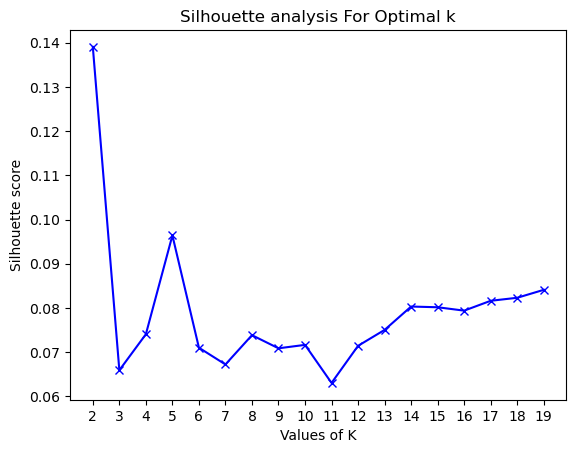

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [i for i in range(2,20)]
silhouette_avg = []
for num_clusters in range_n_clusters:
     # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, random_state = 42)
    kmeans.fit(record_topics_full_df[[f'topic_{i}' for i in range(70)]])
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(record_topics_full_df[[f'topic_{i}' for i in range(70)]], cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')    
plt.xticks(range_n_clusters)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [13]:
optimal_n = 5
kmeans = KMeans(n_clusters=optimal_n, init='k-means++', max_iter=100, n_init=1, random_state = 42)
kmeans.fit(record_topics_full_df[[f'topic_{i}' for i in range(70)]])
cluster_labels = kmeans.labels_
centroids  = kmeans.cluster_centers_
record_topics_full_df['topics_cluster_label'] = cluster_labels

In [14]:
record_all_info_df['topics_cluster_label'] = cluster_labels
record_all_info_df.head()

,record_id,topics,Subclass_id,Class ID,topics_cluster_label
0,1,"[4, 4, 66, 4, 25, 66, 23, 29, 0, 28, 0]","[6, 6, 10, 6, 6, 10, 8, 1, 9, 1, 9]","[0, 0, 4, 0, 0, 4, 1, 1, 3, 1, 3]",1
1,2,"[53, 31, 50, 50, 8, 31, 18, 18, 45, 12, 32, 39...","[5, 7, 4, 4, 0, 7, 0, 0, 10, 4, 0, 0, 0, 0, 7,...","[3, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, ...",4
2,3,"[28, 2, 39, 8, 8, 30, 51, 45, 45, 45, 0, 27, 8...","[1, 9, 0, 0, 0, 4, 0, 10, 10, 10, 9, 5, 0, 10,...","[1, 3, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 2, ...",4
3,4,"[24, 38, 26, 41, 39, 7, 7, 38, 27, 68, 2, 0, 1...","[0, 0, 9, 0, 0, 7, 7, 0, 5, 1, 9, 9, 0, 7, 9, ...","[2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, ...",3
4,5,"[18, 3, 4, 0, 22, 4, 4, 31, 4, 31, 0, 1, 8, 41...","[0, 3, 6, 9, 1, 6, 6, 7, 6, 7, 9, 2, 0, 0, 0, ...","[2, 1, 0, 3, 1, 0, 0, 1, 0, 1, 3, 0, 2, 2, 2, ...",1


In [15]:
[str(i) for i in list(projected_df['Class ID'].unique())]

['0', '4', '1', '3', '2']

In [16]:
from collections import Counter

def find_share(list_vals):
    counted_vals = dict(Counter(list_vals))
    sum_vals = sum(counted_vals.values())
    return {str(key):round((val/sum_vals)*100, 2) for key,val in counted_vals.items()}

unique_classes = [str(i) for i in list(projected_df['Class ID'].unique())]
unique_subclasses = [str(i) for i in list(projected_df['Subclass_id'].unique())]


def analyze_classes(row):
    class_shares = find_share(row['Class ID'])
    for cid in unique_classes:
        if cid not in class_shares.keys():
            class_shares[cid] = 0
    row['class_shares'] = class_shares


    subclass_shares = find_share(row['Subclass_id'])
    for cid in unique_subclasses:
        if cid not in subclass_shares.keys():
            subclass_shares[cid] = 0
    row['subclass_shares'] = subclass_shares

    return row

record_all_analyzed = record_all_info_df.apply(analyze_classes, axis=1)
record_all_analyzed

,record_id,topics,Subclass_id,Class ID,topics_cluster_label,class_shares,subclass_shares
0,1,"[4, 4, 66, 4, 25, 66, 23, 29, 0, 28, 0]","[6, 6, 10, 6, 6, 10, 8, 1, 9, 1, 9]","[0, 0, 4, 0, 0, 4, 1, 1, 3, 1, 3]",1,"{'0': 36.36, '4': 18.18, '1': 27.27, '3': 18.1...","{'6': 36.36, '10': 18.18, '8': 9.09, '1': 18.1..."
1,2,"[53, 31, 50, 50, 8, 31, 18, 18, 45, 12, 32, 39...","[5, 7, 4, 4, 0, 7, 0, 0, 10, 4, 0, 0, 0, 0, 7,...","[3, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, ...",4,"{'3': 4.55, '1': 18.18, '2': 72.73, '4': 4.55,...","{'5': 4.55, '7': 18.18, '4': 27.27, '0': 45.45..."
2,3,"[28, 2, 39, 8, 8, 30, 51, 45, 45, 45, 0, 27, 8...","[1, 9, 0, 0, 0, 4, 0, 10, 10, 10, 9, 5, 0, 10,...","[1, 3, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 2, ...",4,"{'1': 2.63, '3': 13.16, '2': 60.53, '4': 23.68...","{'1': 2.63, '9': 5.26, '0': 31.58, '4': 28.95,..."
3,4,"[24, 38, 26, 41, 39, 7, 7, 38, 27, 68, 2, 0, 1...","[0, 0, 9, 0, 0, 7, 7, 0, 5, 1, 9, 9, 0, 7, 9, ...","[2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, ...",3,"{'2': 26.09, '3': 39.13, '1': 34.78, '0': 0, '...","{'0': 26.09, '9': 30.43, '7': 13.04, '5': 8.7,..."
4,5,"[18, 3, 4, 0, 22, 4, 4, 31, 4, 31, 0, 1, 8, 41...","[0, 3, 6, 9, 1, 6, 6, 7, 6, 7, 9, 2, 0, 0, 0, ...","[2, 1, 0, 3, 1, 0, 0, 1, 0, 1, 3, 0, 2, 2, 2, ...",1,"{'2': 26.32, '1': 21.05, '0': 31.58, '3': 21.0...","{'0': 26.32, '3': 5.26, '6': 21.05, '9': 21.05..."
...,...,...,...,...,...,...,...
381,382,"[19, 6, 49, 17, 17, 3, 3, 15]","[9, 0, 8, 0, 0, 3, 3, 0]","[3, 2, 1, 2, 2, 1, 1, 2]",3,"{'3': 12.5, '2': 50.0, '1': 37.5, '0': 0, '4': 0}","{'9': 12.5, '0': 50.0, '8': 12.5, '3': 25.0, '..."
382,383,"[21, 0, 9, 14, 40, 14, 39, 51, 0, 48, 1]","[2, 9, 2, 2, 2, 2, 0, 0, 9, 2, 2]","[0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 0]",0,"{'0': 63.64, '3': 18.18, '2': 18.18, '4': 0, '...","{'2': 63.64, '9': 18.18, '0': 18.18, '6': 0, '..."
383,384,"[16, 0, 26, 20, 1, 1, 1, 65, 11, 13]","[7, 9, 9, 9, 2, 2, 2, 2, 2, 7]","[1, 3, 3, 3, 0, 0, 0, 0, 0, 1]",0,"{'1': 20.0, '3': 30.0, '0': 50.0, '4': 0, '2': 0}","{'7': 20.0, '9': 30.0, '2': 50.0, '6': 0, '10'..."
384,385,"[28, 60, 53, 60, 60, 27, 60, 17, 51]","[1, 0, 5, 0, 0, 5, 0, 0, 0]","[1, 2, 3, 2, 2, 3, 2, 2, 2]",3,"{'1': 11.11, '2': 66.67, '3': 22.22, '0': 0, '...","{'1': 11.11, '0': 66.67, '5': 22.22, '6': 0, '..."


In [17]:
def find_all_shares(df):
    all_class_shares = list(df['class_shares'])
    all_class_shares_dict = {k:[] for k in unique_classes}
    for c_share in all_class_shares:
        for key, val in c_share.items():
            all_class_shares_dict[key].append(val)
    
    
    all_subclass_shares = list(df['subclass_shares'])
    all_subclass_shares_dict = {k:[] for k in unique_subclasses}
    for sc_share in all_subclass_shares:
        for key, val in sc_share.items():
            all_subclass_shares_dict[key].append(val)

    return all_class_shares_dict, all_subclass_shares_dict

In [18]:
agg_series = record_all_analyzed[['topics_cluster_label', 'class_shares', 'subclass_shares']].groupby(['topics_cluster_label']).apply(find_all_shares)
agg_series

topics_cluster_label
0    ({'0': [61.54, 64.29, 36.36, 33.33, 61.54, 55....
1    ({'0': [36.36, 31.58, 60.0, 53.33, 87.5, 55.56...
2    ({'0': [44.44, 13.33, 12.73, 0, 47.06, 21.43, ...
3    ({'0': [0, 11.11, 22.22, 33.33, 71.43, 0, 0, 7...
4    ({'0': [0, 0, 2.86, 0, 0, 5.0, 7.69, 4.17, 0, ...
dtype: object

In [19]:


class_mapping = {'0': 'nature', '1': 'activities', '2': 'society', '3': 'transport', '4': 'unknown'}
class_mapping_order = ['nature', 'activities', 'society', 'transport', 'unknown']

subclass_mapping = {str(cat_id):str(list(projected_df['Subclass_cat'])[idx]) for idx, cat_id in enumerate(list(projected_df['Subclass_cat'].cat.codes))}
subclass_mapping_order = ['flora and funa', 'natural landmarks',
                          'fishing to surfing', 'picnic area', 'food and beverage', 'sport complexes',
                          'human made landmarks', 'art, history and culture', 
                          'trail-path-and-canal', 'lines and stations',
                          'unknown']

def study_a_cluster(cluster_idx):
    class_distributions_df = pd.DataFrame(agg_series[cluster_idx][0]).rename(columns=class_mapping)
    class_stats = class_distributions_df[class_mapping_order].describe()

    class_distributions_df = pd.DataFrame(agg_series[cluster_idx][1]).rename(columns=subclass_mapping)
    subclass_stats = class_distributions_df[subclass_mapping_order].describe()
    return class_stats, subclass_stats

In [20]:
cluster_idx = 0  # flora and funa!
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

           nature  activities    society  transport    unknown
count   58.000000   58.000000  58.000000  58.000000  58.000000
mean    46.441379   20.166379   6.782586  25.432931   1.177414
std     18.323796   15.990450   8.739164  14.092474   3.470865
min     11.110000    0.000000   0.000000   0.000000   0.000000
25%     33.330000    7.690000   0.000000  17.047500   0.000000
50%     45.295000   18.750000   0.000000  25.000000   0.000000
75%     61.155000   29.500000  12.500000  34.280000   0.000000
max    100.000000   60.000000  30.000000  66.670000  14.290000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,38.932069,7.508448,4.378103,12.578448,0.636034,2.572414,0.183966,6.598793,23.466034,1.967069,1.177414
std,21.597562,10.413102,6.923635,12.020864,1.964453,5.078023,1.013297,8.700379,14.140773,4.555303,3.470865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.802500,0.000000,0.000000
50%,37.500000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,23.080000,0.000000,0.000000
75%,56.605000,12.500000,7.435000,19.687500,0.000000,4.410000,0.000000,12.500000,30.000000,0.000000,0.000000
max,100.000000,45.450000,31.250000,45.450000,7.690000,23.530000,6.670000,30.000000,66.670000,20.000000,14.290000


In [21]:
cluster_idx = 1  # natural landmarks + trails
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

          nature  activities    society  transport    unknown
count  25.000000   25.000000  25.000000  25.000000  25.000000
mean   48.596000   19.594800   7.817200  20.338000   3.654800
std    21.357009   19.472903   9.234492  14.119025   5.636134
min    10.530000    0.000000   0.000000   0.000000   0.000000
25%    31.250000    0.000000   0.000000  10.000000   0.000000
50%    53.330000   14.290000   4.760000  21.050000   0.000000
75%    64.290000   30.000000  13.330000  30.000000   6.670000
max    87.500000   63.160000  30.000000  50.000000  18.180000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,11.708400,36.886400,11.91480,5.106800,1.410400,1.163600,1.640800,6.176800,19.536800,0.800800,3.654800
std,12.814371,16.442782,15.58833,6.141018,4.250072,3.219595,3.460967,7.761152,14.349471,2.365491,5.636134
min,0.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.520000,0.000000,0.000000
50%,9.520000,36.360000,6.67000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
75%,16.670000,45.450000,16.67000,9.520000,0.000000,0.000000,0.000000,12.500000,30.000000,0.000000,6.670000
max,45.450000,77.780000,63.16000,18.750000,16.670000,10.000000,10.000000,26.320000,50.000000,10.000000,18.180000


In [22]:
cluster_idx = 2  # all about trail, path and canals...
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

          nature  activities    society   transport    unknown
count  51.000000   51.000000  51.000000   51.000000  51.000000
mean   17.259412   15.661176   8.398627   56.206863   2.473529
std    13.209583   13.143506  10.892077   16.885191   4.286991
min     0.000000    0.000000   0.000000   23.530000   0.000000
25%     7.290000    2.780000   0.000000   44.945000   0.000000
50%    16.670000   12.500000   5.880000   55.560000   0.000000
75%    26.970000   24.040000  11.805000   66.670000   5.570000
max    47.060000   50.000000  42.860000  100.000000  14.290000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,14.255098,3.004118,3.592157,8.967255,0.438431,2.662745,0.797647,7.600980,53.785686,2.420980,2.473529
std,12.942352,5.778451,5.812985,9.767176,2.072083,5.006992,3.873678,10.370823,15.038564,6.476436,4.286991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.530000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.095000,0.000000,0.000000
50%,11.110000,0.000000,0.000000,8.330000,0.000000,0.000000,0.000000,3.700000,54.550000,0.000000,0.000000
75%,21.825000,3.185000,7.140000,12.915000,0.000000,4.450000,0.000000,10.555000,61.250000,0.000000,5.570000
max,47.060000,21.430000,22.220000,43.750000,13.330000,18.750000,26.670000,42.860000,100.000000,37.500000,14.290000


In [23]:
cluster_idx = 3  # a mixture of nature, picnics and culture
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

           nature  activities     society   transport     unknown
count  228.000000  228.000000  228.000000  228.000000  228.000000
mean    20.253202   30.853553   23.820263   23.863728    1.209386
std     21.486561   23.344114   23.849054   20.635576    3.657058
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000   13.842500    0.000000    6.565000    0.000000
50%     14.835000   28.080000   16.670000   20.345000    0.000000
75%     33.330000   44.440000   40.000000   37.500000    0.000000
max    100.000000  100.000000  100.000000   80.000000   16.670000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,15.288202,4.965044,4.114430,14.331053,5.660000,6.748026,3.745789,20.074342,19.678684,4.185088,1.209386
std,19.913759,9.627478,9.313111,13.581746,12.967391,11.159051,8.447869,20.959225,19.188425,9.823424,3.657058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.330000,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,16.670000,14.290000,0.000000,0.000000
75%,25.000000,9.090000,0.000000,22.435000,6.610000,11.110000,0.000000,32.017500,33.330000,0.000000,0.000000
max,100.000000,62.500000,71.430000,83.330000,85.710000,60.000000,57.140000,87.500000,80.000000,60.000000,16.670000


In [24]:
cluster_idx = 4  # NOTE: man-made features and art, history and culture...
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

          nature  activities     society  transport    unknown
count  24.000000   24.000000   24.000000  24.000000  24.000000
mean    3.590417    9.080417   69.910417   8.270000   9.146667
std     4.760336    8.498959   18.962621   9.577104  14.728836
min     0.000000    0.000000   23.080000   0.000000   0.000000
25%     0.000000    0.000000   61.287500   0.000000   0.000000
50%     0.000000    8.115000   75.000000   6.695000   4.360000
75%     6.250000   15.947500   80.587500  12.500000   8.707500
max    15.380000   25.710000  100.000000  37.140000  61.540000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,3.009583,0.580833,0.239583,3.493333,3.163750,2.183333,35.948750,33.961250,3.533750,4.736250,9.146667
std,4.731962,1.979260,0.814907,5.571229,5.048964,3.123377,18.911313,16.444639,5.666895,6.419966,14.728836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.270000,22.310000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.050000,30.385000,0.000000,0.000000,4.360000
75%,5.220000,0.000000,0.000000,5.880000,5.752500,5.000000,44.817500,45.625000,5.972500,7.740000,8.707500
max,15.380000,7.690000,3.120000,18.180000,15.380000,9.090000,77.140000,75.000000,21.050000,22.860000,61.540000


#### NOTE:

How to visualize the results to express the leisure walks and the compositions of POI categories...

## Annotated OSM results

In [25]:
api_endpoint = 'https://www.openstreetmap.org/api/0.6/{0}/{1}.json'
headers = {"Content-Type": "application/json; charset=utf-8"}

def get_info(otype, oid):
    if otype not in ['node', 'way', 'relation']:
        logger.warning('wrong type - {}'.format(otype))
    resp = requests.get(api_endpoint.format(otype, oid), headers=headers)
    return resp.json()